In [ ]:
from google.colab import files

uploaded = files.upload()


Saving sales_1032_records.xlsx to sales_1032_records.xlsx


In [ ]:
import pandas as pd

# Replace the file name with the one you uploaded
# Skip the first row as it doesn't contain the header
df = pd.read_excel('sales_1032_records.xlsx', skiprows=1)

# Show top 5 rows
display(df.head())

,sale_id,product_id,product_type,product_flavor,quantity,unit_price,total_price,sale_date,customer_id,payment_mode
0,1,13,bento,chocolate,2,350,700,2025-06-06,6111,card
1,2,17,bento,nutella,1,450,450,2023-08-05,5456,card
2,3,10,cake,red velvet,3,700,2100,2023-06-28,9822,cash
3,4,11,cake,lemon blueberry,3,750,2250,2023-11-24,9326,card
4,5,18,bento,nutella rocher,4,500,2000,2023-08-22,8554,card


BASIC CLEANING AND EXPLORATION

In [ ]:
# Step 1: Check structure
print("Dataset shape:", df.shape)
print("\nColumn Data Types:\n", df.dtypes)

# Step 2: Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Step 3: Convert date columns if needed
df['sale_date'] = pd.to_datetime(df['sale_date'], errors='coerce')
# df['delivery_start_time'] = pd.to_datetime(df['delivery_start_time'], errors='coerce')
# df['delivery_end_time'] = pd.to_datetime(df['delivery_end_time'], errors='coerce')

# Step 4: Quick statistics
print("\nDescriptive Statistics:\n", df.describe())

# Optional: Display sample records
df.sample(5)

Dataset shape: (1032, 10)

Column Data Types:
 sale_id            int64
product_id         int64
product_type      object
product_flavor    object
quantity           int64
unit_price         int64
total_price        int64
sale_date         object
customer_id        int64
payment_mode      object
dtype: object

Missing Values:
 sale_id           0
product_id        0
product_type      0
product_flavor    0
quantity          0
unit_price        0
total_price       0
sale_date         0
customer_id       0
payment_mode      0
dtype: int64

Descriptive Statistics:
            sale_id   product_id     quantity   unit_price   total_price  \
count  1032.000000  1032.000000  1032.000000  1032.000000   1032.000000   
mean    516.500000     9.286822     7.958333   558.275194   4531.666667   
min       1.000000     1.000000     1.000000   330.000000    330.000000   
25%     258.750000     5.000000     2.000000   450.000000   1050.000000   
50%     516.500000     9.000000     4.000000   540.000000

,sale_id,product_id,product_type,product_flavor,quantity,unit_price,total_price,sale_date,customer_id,payment_mode
54,55,13,bento,chocolate,2,350,700,2022-06-01,9373,card
750,751,4,cupcake,cookies and cream,6,540,3240,2024-09-13,8306,upi
187,188,13,bento,chocolate,4,350,1400,2024-01-19,8436,card
233,234,6,cupcake,nutella,18,600,10800,2024-12-09,6187,cash
413,414,4,cupcake,cookies and cream,18,540,9720,2024-07-14,8631,upi


SALES KPI

1.   Total Revenue
2.   Average order value
3.   Total units sold
4.   Revenue by product type
5.   Revenue by product flavour
6.   Best selling products
7.   Revenue over time

🔍 Sample Data:


,sale_id,product_id,product_type,product_flavor,quantity,unit_price,total_price,sale_date,customer_id,payment_mode
0,1,13,bento,chocolate,2,350,700,2025-06-06,6111,card
1,2,17,bento,nutella,1,450,450,2023-08-05,5456,card
2,3,10,cake,red velvet,3,700,2100,2023-06-28,9822,cash
3,4,11,cake,lemon blueberry,3,750,2250,2023-11-24,9326,card
4,5,18,bento,nutella rocher,4,500,2000,2023-08-22,8554,card



📊 --- SALES KPIs ---
1. Total Revenue: ₹4,676,680.00
2. Total Units Sold: 8,213
3. Average Revenue per Order: ₹4,531.67
4. Average Units per Order: 7.96
5. Average Unit Price: ₹558.28
6. Total Orders: 1,032
7. Unique Customers: 980

8. Best-Selling Product Type:
product_type
cupcake    6696
Name: quantity, dtype: int64

9. Most Popular Product Flavor:
product_flavor
chocolate    172
Name: count, dtype: int64

10. Sales by Payment Mode:
payment_mode
upi     369
card    334
cash    329
Name: count, dtype: int64


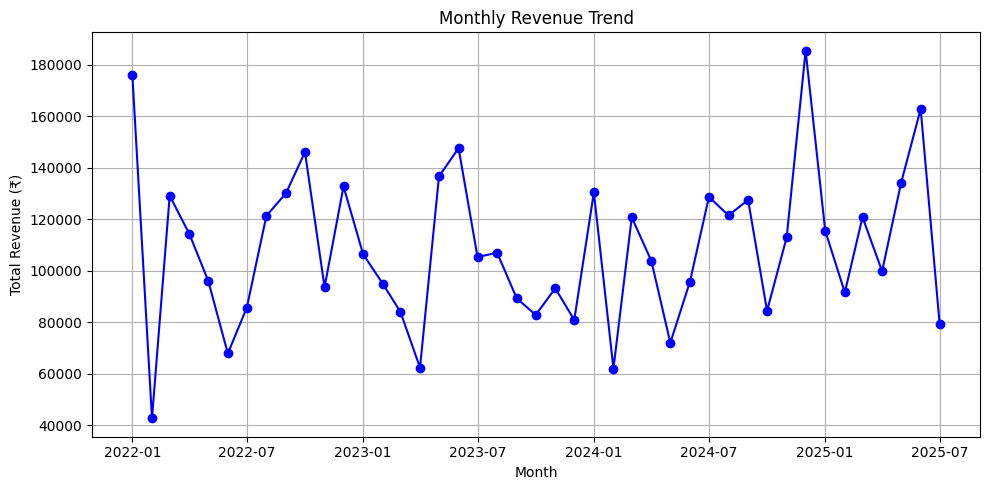

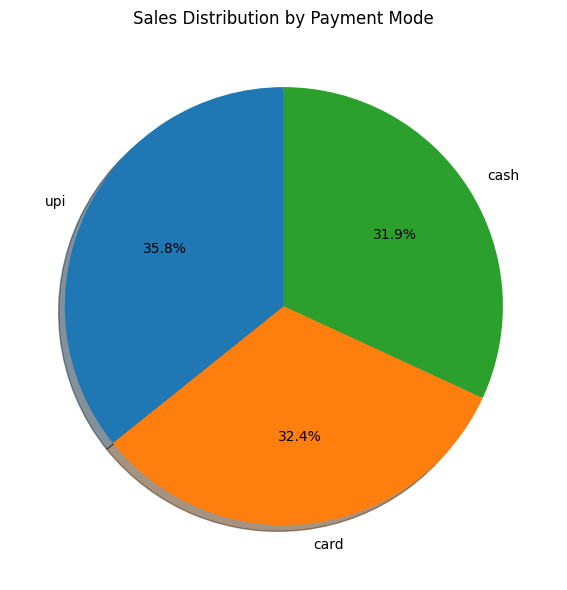

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_excel("sales_1032_records.xlsx", skiprows=1)  # Update if needed

print("🔍 Sample Data:")
display(df.head())

# Convert sale_date to datetime
df['sale_date'] = pd.to_datetime(df['sale_date'], errors='coerce')


# ----- SALES KPIs -----
print("\n📊 --- SALES KPIs ---")

# 1. Total Revenue
total_revenue = df['total_price'].sum()
print(f"1. Total Revenue: ₹{total_revenue:,.2f}")

# 2. Total Units Sold
total_units = df['quantity'].sum()
print(f"2. Total Units Sold: {total_units:,}")

# 3. Average Revenue per Order
avg_revenue_order = df['total_price'].mean()
print(f"3. Average Revenue per Order: ₹{avg_revenue_order:,.2f}")

# 4. Average Units per Order
avg_units_order = df['quantity'].mean()
print(f"4. Average Units per Order: {avg_units_order:.2f}")

# 5. Average Unit Price
avg_unit_price = df['unit_price'].mean()
print(f"5. Average Unit Price: ₹{avg_unit_price:,.2f}")

# 6. Total Orders
total_orders = df['sale_id'].nunique()
print(f"6. Total Orders: {total_orders:,}")

# 7. Unique Customers
unique_customers = df['customer_id'].nunique()
print(f"7. Unique Customers: {unique_customers:,}")

# 8. Best-Selling Product Type
popular_product = df.groupby('product_type')['quantity'].sum().sort_values(ascending=False).head(1)
print("\n8. Best-Selling Product Type:")
print(popular_product)

# 9. Most Popular Product Flavor
popular_flavor = df['product_flavor'].value_counts().head(1)
print("\n9. Most Popular Product Flavor:")
print(popular_flavor)

# 10. Sales by Payment Mode
payment_mode_sales = df['payment_mode'].value_counts()
print("\n10. Sales by Payment Mode:")
print(payment_mode_sales)

# ----------------------------
# 📊 Line Chart: Revenue Over Time
# ----------------------------
df_by_date = df.groupby(df['sale_date'].dt.to_period("M"))['total_price'].sum()
df_by_date.index = df_by_date.index.to_timestamp()

plt.figure(figsize=(10, 5))
plt.plot(df_by_date.index, df_by_date.values, marker='o', linestyle='-', color='blue')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue (₹)")
plt.grid(True)
plt.tight_layout()
plt.show()

# ----- PIE CHART: Payment Mode Distribution -----
plt.figure(figsize=(6, 6))
payment_mode_sales.plot.pie(autopct='%1.1f%%', startangle=90, shadow=True)
plt.title("Sales Distribution by Payment Mode")
plt.ylabel("")  # Hide y-label
plt.tight_layout()
plt.show()

BUSINESS KPI'S


1. Top 5 Customers by Revenue
2. Top 5 Product Flavors by Revenue
3. Top 5 Product Types by Quantity Sold
4. Average Revenue per Customer
5. Repeat Customer Rate
6. Sales Trend (Optional Line Chart)



📈 --- BUSINESS KPIs ---

1. Top 5 Customers by Revenue:


,total_price
customer_id,
2753,24780
6856,24660
3106,24360
5836,17200
6384,15960



2. Top 5 Product Flavors by Revenue:


,total_price
product_flavor,
chocolate,753380
nutella,733050
cookies and cream,678380
red velvet,647980
classic vanilla,644940



3. Top 5 Product Types by Quantity Sold:


,quantity
product_type,
cupcake,6696
bento,849
cake,564
tiramisu,104



4. Average Revenue per Customer: ₹4,772.12
5. Repeat Customer Rate: 5.31%


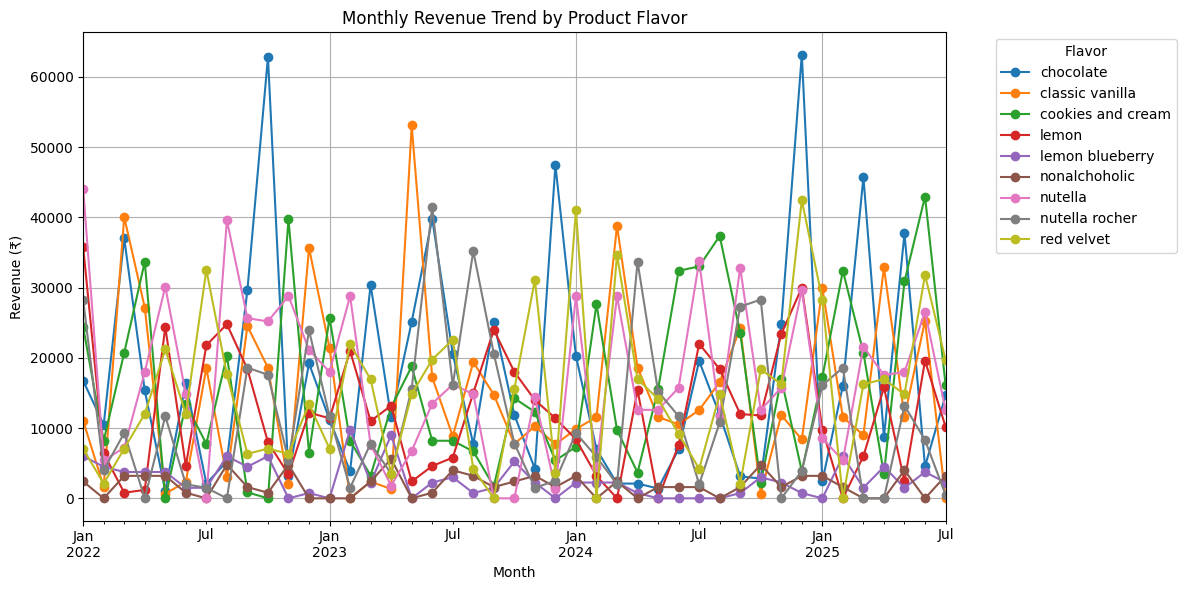

In [ ]:
# BUSINESS KPIs

print("\n📈 --- BUSINESS KPIs ---")

# 1. Top 5 Customers by Revenue
top_customers = df.groupby('customer_id')['total_price'].sum().sort_values(ascending=False).head(5)
print("\n1. Top 5 Customers by Revenue:")
display(top_customers)

# 2. Top 5 Product Flavors by Revenue
top_flavors = df.groupby('product_flavor')['total_price'].sum().sort_values(ascending=False).head(5)
print("\n2. Top 5 Product Flavors by Revenue:")
display(top_flavors)

# 3. Top 5 Product Types by Quantity Sold
top_types = df.groupby('product_type')['quantity'].sum().sort_values(ascending=False).head(5)
print("\n3. Top 5 Product Types by Quantity Sold:")
display(top_types)

# 4. Average Revenue per Customer
avg_rev_per_customer = df.groupby('customer_id')['total_price'].sum().mean()
print(f"\n4. Average Revenue per Customer: ₹{avg_rev_per_customer:,.2f}")

# 5. Repeat Customer Rate
customer_purchase_counts = df['customer_id'].value_counts()
repeat_customers = customer_purchase_counts[customer_purchase_counts > 1].count()
total_customers = df['customer_id'].nunique()
repeat_customer_rate = (repeat_customers / total_customers) * 100
print(f"5. Repeat Customer Rate: {repeat_customer_rate:.2f}%")

# 6. Line Chart: Product Flavor Revenue Trend (Optional)
df_flavor_trend = df.groupby([df['sale_date'].dt.to_period('M'), 'product_flavor'])['total_price'].sum().unstack().fillna(0)
df_flavor_trend.index = df_flavor_trend.index.to_timestamp()

df_flavor_trend.plot(figsize=(12, 6), marker='o')
plt.title("Monthly Revenue Trend by Product Flavor")
plt.xlabel("Month")
plt.ylabel("Revenue (₹)")
plt.grid(True)
plt.legend(title="Flavor", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


PRODUCT KPI'S


1. Best-Selling Product Flavor (by quantity)
2. Best-Selling Product Type (by quantity)
3. Most Profitable Product Flavor (by revenue)
4. Most Profitable Product Type (by revenue)
5. Average Price per Product Type
6. Pie Chart: Revenue Share by Product Type




📦 --- PRODUCT KPIs ---

1. Best-Selling Product Flavors (by quantity):


,quantity
product_flavor,
cookies and cream,1286
nutella,1257
classic vanilla,1238
chocolate,1234
lemon,1087



2. Best-Selling Product Types (by quantity):


,quantity
product_type,
cupcake,6696
bento,849
cake,564
tiramisu,104



3. Most Profitable Product Flavors (by revenue):


,total_price
product_flavor,
chocolate,753380
nutella,733050
cookies and cream,678380
red velvet,647980
classic vanilla,644940



4. Most Profitable Product Types (by revenue):


,total_price
product_type,
cupcake,3848220
cake,399850
bento,345410
tiramisu,83200



5. Average Unit Price per Product Type:


,unit_price
product_type,
tiramisu,800.000000
cake,709.022222
cupcake,573.726415
bento,407.522124


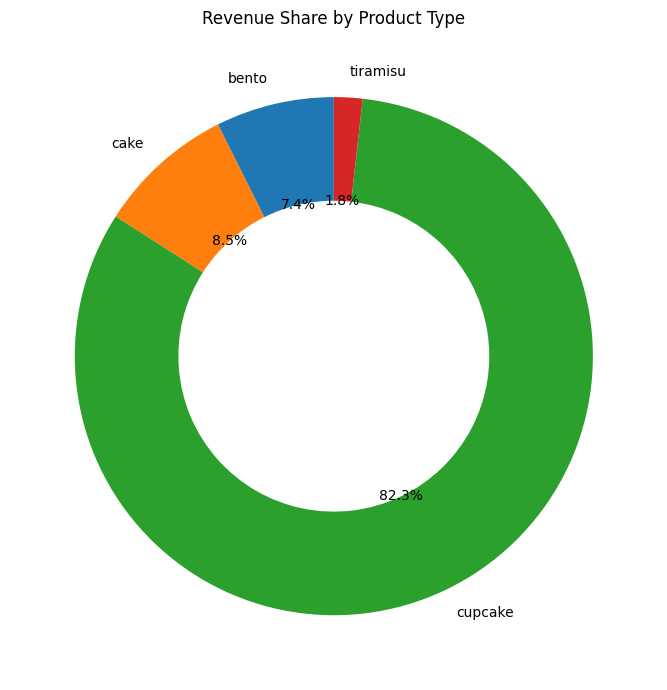

In [ ]:
# PRODUCT KPIs

print("\n📦 --- PRODUCT KPIs ---")

# 1. Best-Selling Product Flavor (by quantity)
best_flavor = df.groupby('product_flavor')['quantity'].sum().sort_values(ascending=False)
print("\n1. Best-Selling Product Flavors (by quantity):")
display(best_flavor.head(5))

# 2. Best-Selling Product Type (by quantity)
best_type_qty = df.groupby('product_type')['quantity'].sum().sort_values(ascending=False)
print("\n2. Best-Selling Product Types (by quantity):")
display(best_type_qty.head(5))

# 3. Most Profitable Product Flavor (by revenue)
profitable_flavor = df.groupby('product_flavor')['total_price'].sum().sort_values(ascending=False)
print("\n3. Most Profitable Product Flavors (by revenue):")
display(profitable_flavor.head(5))

# 4. Most Profitable Product Type (by revenue)
profitable_type = df.groupby('product_type')['total_price'].sum().sort_values(ascending=False)
print("\n4. Most Profitable Product Types (by revenue):")
display(profitable_type.head(5))

# 5. Average Price per Product Type
avg_price_type = df.groupby('product_type')['unit_price'].mean().sort_values(ascending=False)
print("\n5. Average Unit Price per Product Type:")
display(avg_price_type)

# 6. Pie Chart: Revenue Share by Product Type
plt.figure(figsize=(7,7))
df.groupby('product_type')['total_price'].sum().plot.pie(autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))
plt.title("Revenue Share by Product Type")
plt.ylabel("")
plt.tight_layout()
plt.show()


CUSTOMER KPIs

1. Total Unique Customers
2. Repeat Customers Count
3. Repeat Purchase Rate (%)
4. Top 5 Customers by Total Revenue
5. Average Spend Per Customer
6. Bar Chart of Top 5 Customers by Revenue


 Total Unique Customers: 980
 Repeat Customers: 52
 Repeat Purchase Rate: 5.31%
 Average Spend per Customer: ₹4772.12

 Top 5 Customers by Revenue:
 customer_id
2753    24780
6856    24660
3106    24360
5836    17200
6384    15960
Name: total_price, dtype: int64


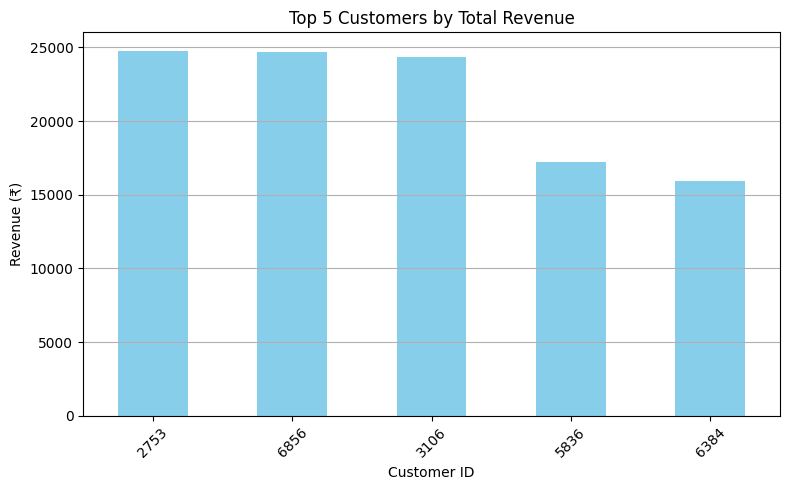

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named `df`
# 1. Total Unique Customers
total_customers = df['customer_id'].nunique()

# 2. Repeat Customers
repeat_customers = df[df.duplicated(subset='customer_id', keep=False)]['customer_id'].nunique()

# 3. Repeat Purchase Rate (%)
repeat_rate = (repeat_customers / total_customers) * 100

# 4. Top 5 Customers by Total Revenue
top_customers = df.groupby('customer_id')['total_price'].sum().sort_values(ascending=False).head(5)

# 5. Average Spend Per Customer
avg_spend = df.groupby('customer_id')['total_price'].sum().mean()

# Print KPIs
print(f" Total Unique Customers: {total_customers}")
print(f" Repeat Customers: {repeat_customers}")
print(f" Repeat Purchase Rate: {repeat_rate:.2f}%")
print(f" Average Spend per Customer: ₹{avg_spend:.2f}\n")

print(" Top 5 Customers by Revenue:\n", top_customers)

# 6. Bar Chart of Top 5 Customers
plt.figure(figsize=(8,5))
top_customers.plot(kind='bar', color='skyblue')
plt.title("Top 5 Customers by Total Revenue")
plt.xlabel("Customer ID")
plt.ylabel("Revenue (₹)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()


TIME-BASED KPI'S

1. Monthly Total Sales
2. Monthly Average Order Value
3. Top 3 Months with Highest Sales
4. Bar Chart – Monthly Sales
5. Line Chart – Monthly Sales Trend

 Monthly Sales:
 year_month
2022-01    175850
2022-02     42750
2022-03    129150
2022-04    114390
2022-05     96110
2022-06     67920
2022-07     85730
2022-08    121380
2022-09    130150
2022-10    146120
2022-11     93670
2022-12    132770
2023-01    106460
2023-02     95040
2023-03     84070
2023-04     62420
2023-05    136630
2023-06    147630
2023-07    105360
2023-08    107020
2023-09     89320
2023-10     82890
2023-11     93220
2023-12     80940
2024-01    130420
2024-02     62060
2024-03    120750
2024-04    103800
2024-05     72080
2024-06     95760
2024-07    128710
2024-08    121510
2024-09    127530
2024-10     84490
2024-11    112960
2024-12    185440
2025-01    115580
2025-02     91600
2025-03    120830
2025-04     99880
2025-05    134100
2025-06    162850
2025-07     79340
Freq: M, Name: total_price, dtype: int64

 Monthly Average Order Value:
 year_month
2022-01    5024.285714
2022-02    2375.000000
2022-03    4783.333333
2022-04    4575.600000
2022-05    4805.500000

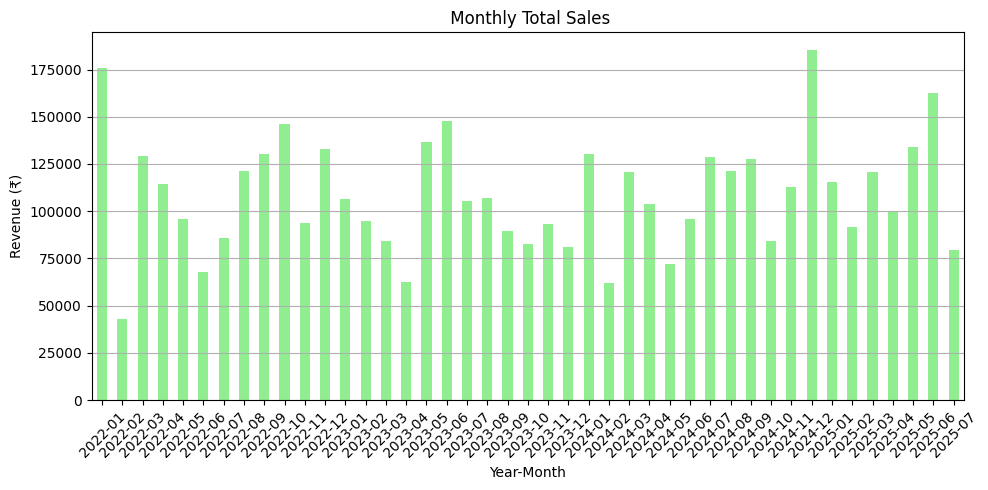

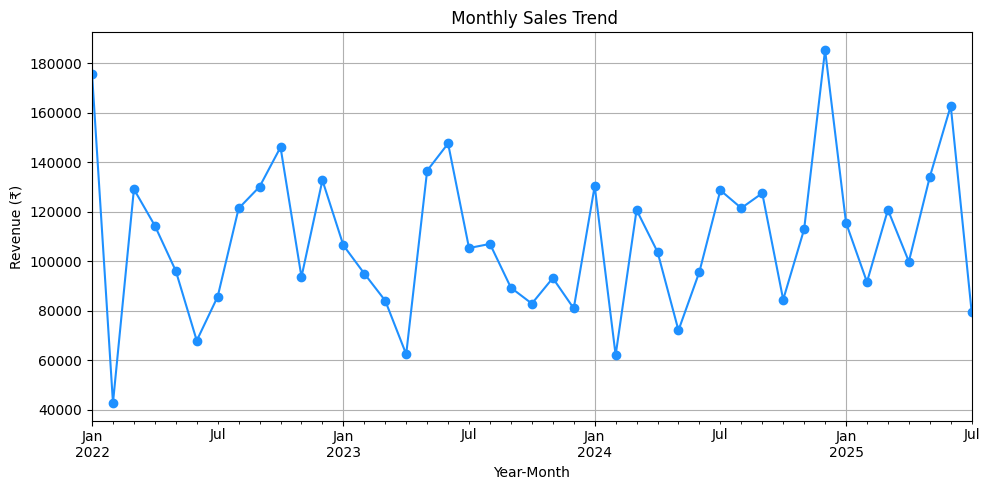

In [ ]:
# Ensure sale_date is in datetime format
df['sale_date'] = pd.to_datetime(df['sale_date'])

# Extract Year-Month
df['year_month'] = df['sale_date'].dt.to_period('M')

# 1. Monthly Total Sales
monthly_sales = df.groupby('year_month')['total_price'].sum()

# 2. Monthly Average Order Value
monthly_avg_order = df.groupby('year_month')['total_price'].mean()

# 3. Top 3 Months by Sales
top_3_months = monthly_sales.sort_values(ascending=False).head(3)

# Print KPIs
print(" Monthly Sales:\n", monthly_sales)
print("\n Monthly Average Order Value:\n", monthly_avg_order)
print("\n Top 3 Months by Total Sales:\n", top_3_months)

# 4. Bar Chart – Monthly Sales
monthly_sales.plot(kind='bar', color='lightgreen', figsize=(10,5))
plt.title(" Monthly Total Sales")
plt.xlabel("Year-Month")
plt.ylabel("Revenue (₹)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 5. Line Chart – Monthly Sales Trend
monthly_sales.plot(kind='line', marker='o', color='dodgerblue', figsize=(10,5))
plt.title(" Monthly Sales Trend")
plt.xlabel("Year-Month")
plt.ylabel("Revenue (₹)")
plt.grid(True)
plt.tight_layout()
plt.show()


PRODUCT KPI'S

1. Top 5 Products by Total Revenue
2. Top 5 Flavors by Revenue
3. Top 5 Product Types by Units Sold
4. Bar Charts for visualisation


 Top 5 Products by Revenue:
 product_id
6    669600
4    615600
1    602880
3    538080
2    515160
Name: total_price, dtype: int64

 Top 5 Flavors by Revenue:
 product_flavor
chocolate            753380
nutella              733050
cookies and cream    678380
red velvet           647980
classic vanilla      644940
Name: total_price, dtype: int64

 Top 5 Product Types by Units Sold:
 product_type
cupcake     6696
bento        849
cake         564
tiramisu     104
Name: quantity, dtype: int64


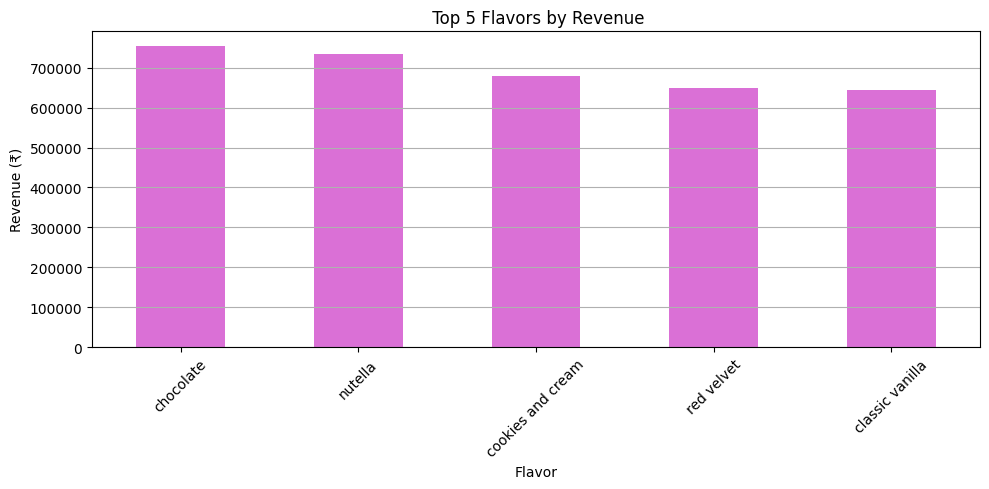

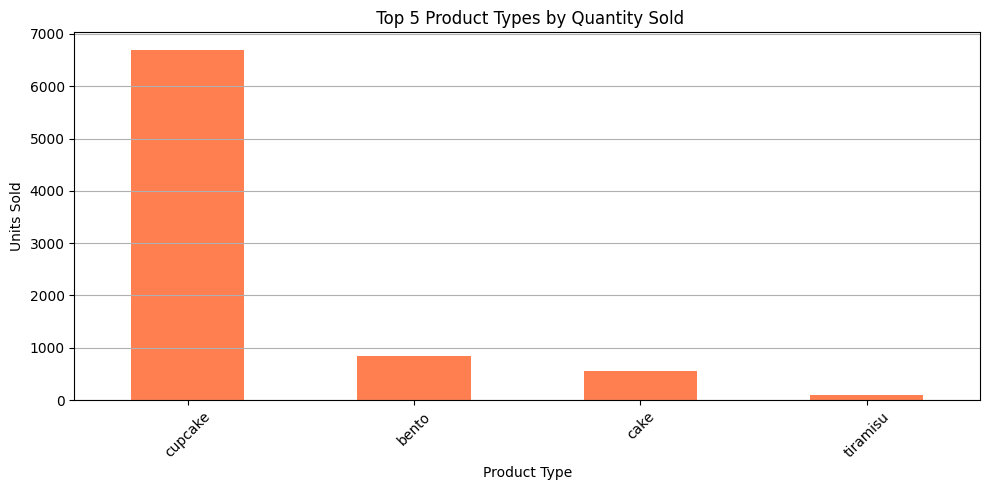

In [ ]:
# 1. Top 5 Products by Total Revenue
top_products = df.groupby('product_id')['total_price'].sum().sort_values(ascending=False).head(5)
print(" Top 5 Products by Revenue:\n", top_products)

# 2. Top 5 Flavors by Revenue
top_flavors = df.groupby('product_flavor')['total_price'].sum().sort_values(ascending=False).head(5)
print("\n Top 5 Flavors by Revenue:\n", top_flavors)

# 3. Top 5 Product Types by Units Sold
top_types = df.groupby('product_type')['quantity'].sum().sort_values(ascending=False).head(5)
print("\n Top 5 Product Types by Units Sold:\n", top_types)

# 4. Visualization
plt.figure(figsize=(10,5))
top_flavors.plot(kind='bar', color='orchid')
plt.title(" Top 5 Flavors by Revenue")
plt.xlabel("Flavor")
plt.ylabel("Revenue (₹)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
top_types.plot(kind='bar', color='coral')
plt.title(" Top 5 Product Types by Quantity Sold")
plt.xlabel("Product Type")
plt.ylabel("Units Sold")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


PAYMENT MODE KPI'S

1. Payment Mode Distribution (Count)
2. Total Revenue by Payment Mode
3. Pie Chart of Payment Mode Usage
4. Bar Chart of Revenue by Payment Mode




💳 Payment Mode Count:
 payment_mode
upi     369
card    334
cash    329
Name: count, dtype: int64

💰 Revenue by Payment Mode:
 payment_mode
upi     1625680
card    1574450
cash    1476550
Name: total_price, dtype: int64


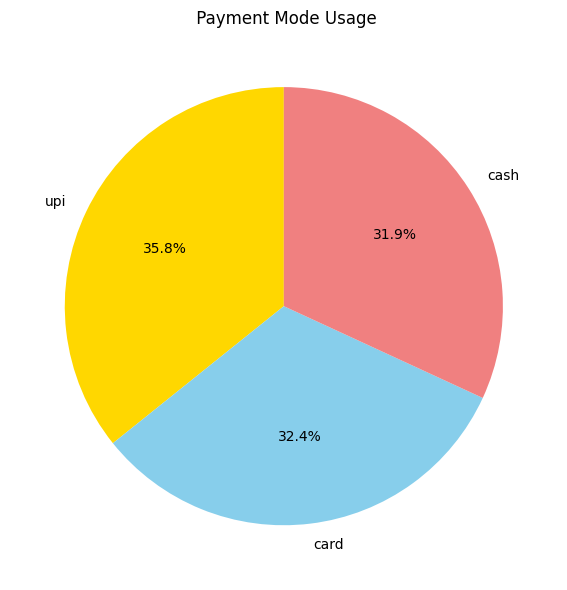

/tmp/ipython-input-3275859200.py:25: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


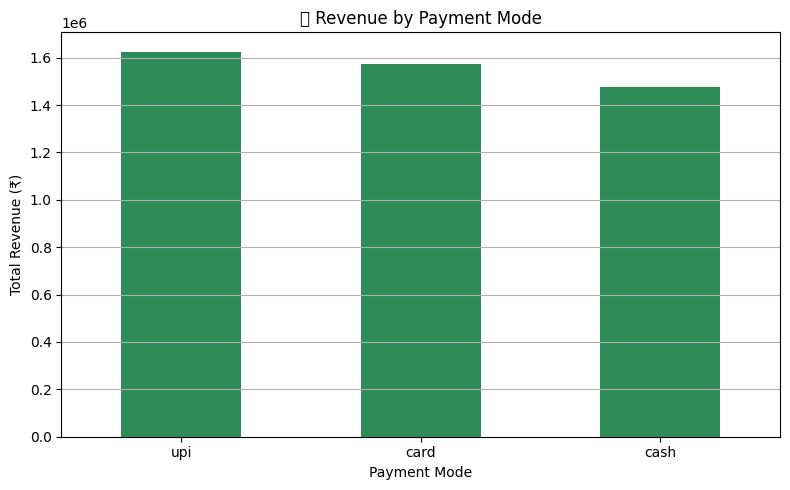

In [ ]:
# 1. Payment Mode Distribution (Count)
payment_count = df['payment_mode'].value_counts()
print("💳 Payment Mode Count:\n", payment_count)

# 2. Total Revenue by Payment Mode
payment_revenue = df.groupby('payment_mode')['total_price'].sum().sort_values(ascending=False)
print("\n💰 Revenue by Payment Mode:\n", payment_revenue)

# 3. Pie Chart of Payment Mode Usage
plt.figure(figsize=(6,6))
payment_count.plot.pie(autopct='%1.1f%%', startangle=90, colors=['gold', 'skyblue', 'lightcoral'])
plt.title(" Payment Mode Usage")
plt.ylabel('')
plt.tight_layout()
plt.show()

# 4. Bar Chart of Revenue by Payment Mode
plt.figure(figsize=(8,5))
payment_revenue.plot(kind='bar', color='seagreen')
plt.title("💰 Revenue by Payment Mode")
plt.xlabel("Payment Mode")
plt.ylabel("Total Revenue (₹)")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


EDA INSIGHTS

 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   sale_id         1032 non-null   int64         
 1   product_id      1032 non-null   int64         
 2   product_type    1032 non-null   object        
 3   product_flavor  1032 non-null   object        
 4   quantity        1032 non-null   int64         
 5   unit_price      1032 non-null   int64         
 6   total_price     1032 non-null   int64         
 7   sale_date       1032 non-null   datetime64[ns]
 8   customer_id     1032 non-null   int64         
 9   payment_mode    1032 non-null   object        
 10  year_month      1032 non-null   period[M]     
dtypes: datetime64[ns](1), int64(6), object(3), period[M](1)
memory usage: 88.8+ KB
None

 First 5 rows:
   sale_id  product_id product_type   product_flavor  quantity  unit_price  \
0        1     

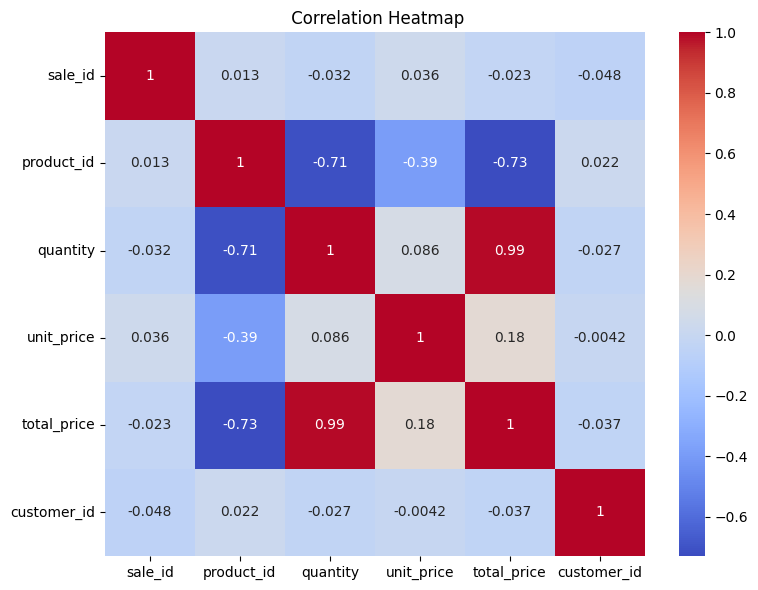

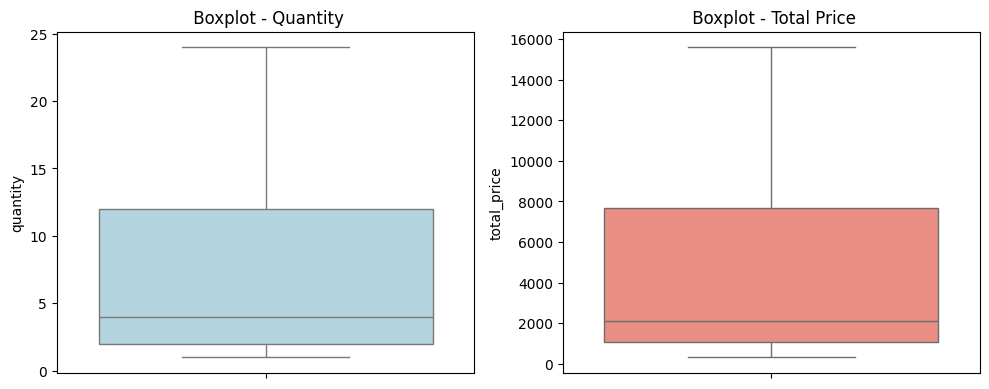

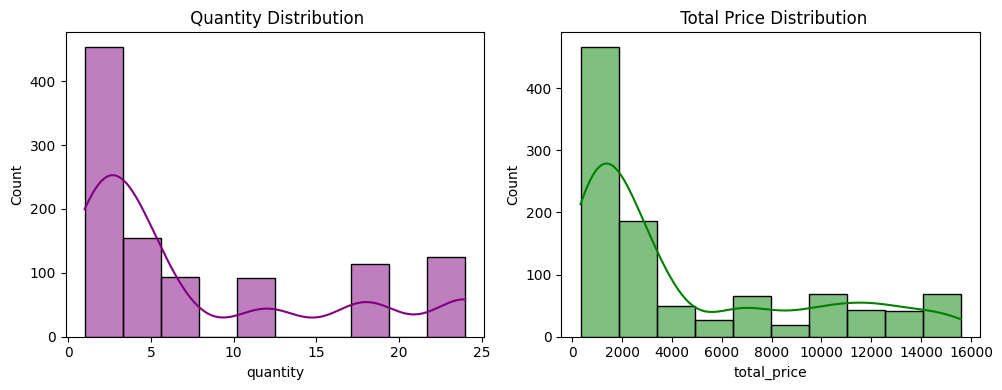

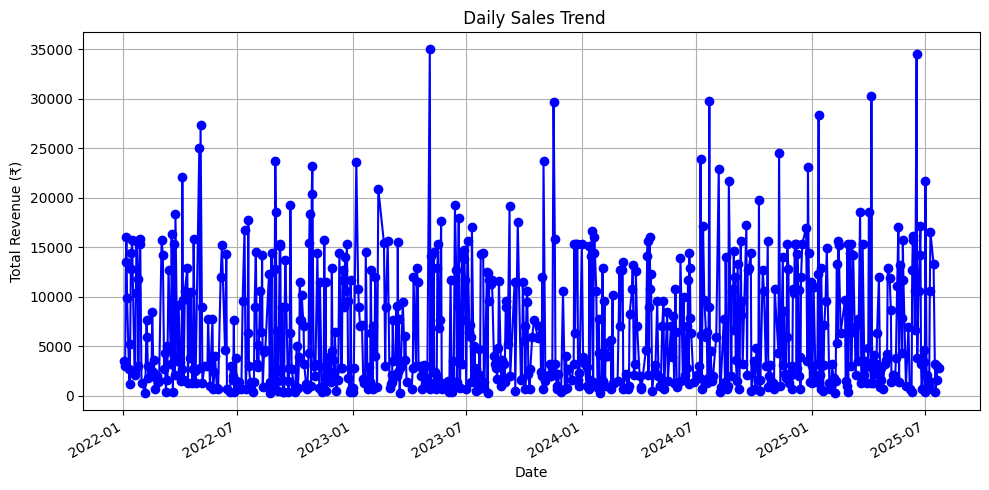

In [ ]:
import seaborn as sns

# 1. Dataset Info
print(" Dataset Overview:")
print(df.info())
print("\n First 5 rows:")
print(df.head())

# 2. Summary Stats
print("\n Summary Statistics:")
print(df.describe())

# 3. Correlation Heatmap (only numeric cols)
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title(" Correlation Heatmap")
plt.tight_layout()
plt.show()

# 4. Outlier Detection (Boxplot for Quantity and Total Price)
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='quantity', color='lightblue')
plt.title(" Boxplot - Quantity")

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='total_price', color='salmon')
plt.title(" Boxplot - Total Price")
plt.tight_layout()
plt.show()

# 5. Distribution of Quantity & Total Price
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df['quantity'], bins=10, kde=True, color='purple')
plt.title(" Quantity Distribution")

plt.subplot(1,2,2)
sns.histplot(df['total_price'], bins=10, kde=True, color='green')
plt.title(" Total Price Distribution")
plt.tight_layout()
plt.show()

# 6. Product Sales Trend Over Time (Line Chart)
df['sale_date'] = pd.to_datetime(df['sale_date'])
daily_sales = df.groupby('sale_date')['total_price'].sum()

plt.figure(figsize=(10,5))
daily_sales.plot(kind='line', marker='o', linestyle='-', color='blue')
plt.title(" Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Revenue (₹)")
plt.grid(True)
plt.tight_layout()
plt.show()


Business Intelligence Metrics – Goals:

1. Total Revenue by Month – (Line chart)
2. Revenue by Product Type – (Bar chart or Pie chart)
3. Average Revenue per Customer
4. Top 5 Performing Products by Revenue
5. Bottom 5 Performing Products by Revenue
6. Total Orders by Payment Mode – (Pie chart)
7. Repeat Customer Count (based on how often customer_id repeats)

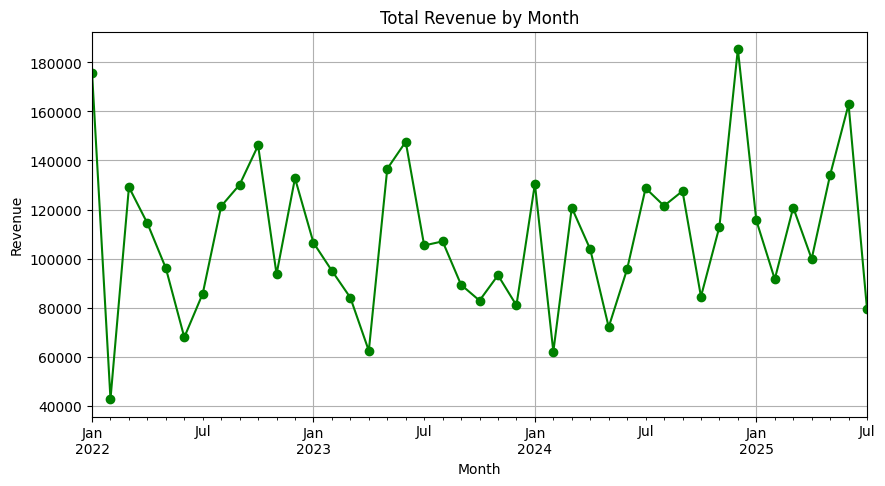

/tmp/ipython-input-3184401938.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='product_type', y='total_price', data=df, estimator=sum, ci=None)


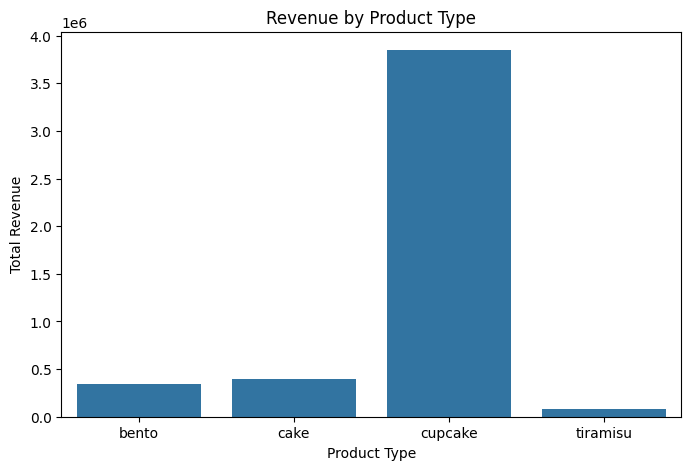

 Average Revenue per Customer: ₹4772.12

 Top 5 Products by Revenue:
product_flavor
chocolate            753380
nutella              733050
cookies and cream    678380
red velvet           647980
classic vanilla      644940
Name: total_price, dtype: int64

 Bottom 5 Products by Revenue:
product_flavor
nonalchoholic       83200
lemon blueberry    111750
nutella rocher     494400
lemon              529600
classic vanilla    644940
Name: total_price, dtype: int64


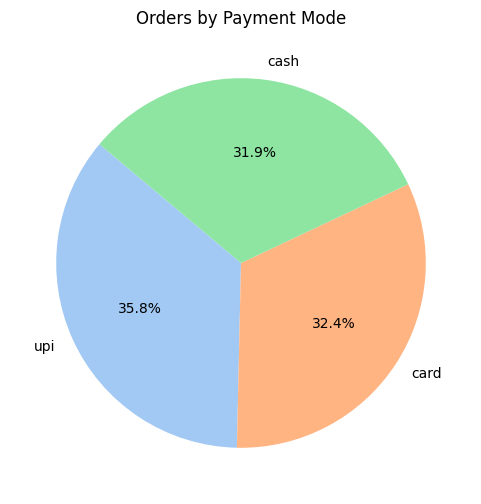


 Number of Repeat Customers: 52


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your DataFrame
df['sale_date'] = pd.to_datetime(df['sale_date'])
df['month'] = df['sale_date'].dt.to_period('M')

# 1. Total Revenue by Month
monthly_revenue = df.groupby('month')['total_price'].sum()
plt.figure(figsize=(10,5))
monthly_revenue.plot(kind='line', marker='o', color='green')
plt.title("Total Revenue by Month")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.grid(True)
plt.show()

# 2. Revenue by Product Type
plt.figure(figsize=(8,5))
sns.barplot(x='product_type', y='total_price', data=df, estimator=sum, ci=None)
plt.title("Revenue by Product Type")
plt.xlabel("Product Type")
plt.ylabel("Total Revenue")
plt.show()

# 3. Average Revenue per Customer
avg_rev_per_customer = df.groupby('customer_id')['total_price'].sum().mean()
print(f" Average Revenue per Customer: ₹{avg_rev_per_customer:.2f}")

# 4. Top 5 Products by Revenue
top_5_products = df.groupby('product_flavor')['total_price'].sum().sort_values(ascending=False).head(5)
print("\n Top 5 Products by Revenue:")
print(top_5_products)

# 5. Bottom 5 Products by Revenue
bottom_5_products = df.groupby('product_flavor')['total_price'].sum().sort_values(ascending=True).head(5)
print("\n Bottom 5 Products by Revenue:")
print(bottom_5_products)

# 6. Total Orders by Payment Mode
payment_counts = df['payment_mode'].value_counts()
plt.figure(figsize=(6,6))
payment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Orders by Payment Mode")
plt.ylabel("")
plt.show()

# 7. Repeat Customer Count
repeat_customers = df['customer_id'].value_counts()
repeat_count = (repeat_customers > 1).sum()
print(f"\n Number of Repeat Customers: {repeat_count}")


OPERATIONAL ANALYTICS KPI'S

1. Total Quantity Sold by Product Type
2. Average Quantity Sold per Order
3. Sales Volume Trend Over Time (Line Chart)
4. Order Count by Day of Week
5. Most Frequently Sold Product Flavor
6. Most Used Payment Mode
7. Average Unit Price by Product Type
8. Peak Sales Day (The single day with the highest total revenue)



 Total Quantity Sold by Product Type:
product_type
cupcake     6696
bento        849
cake         564
tiramisu     104
Name: quantity, dtype: int64

 Average Quantity per Order: 7.96


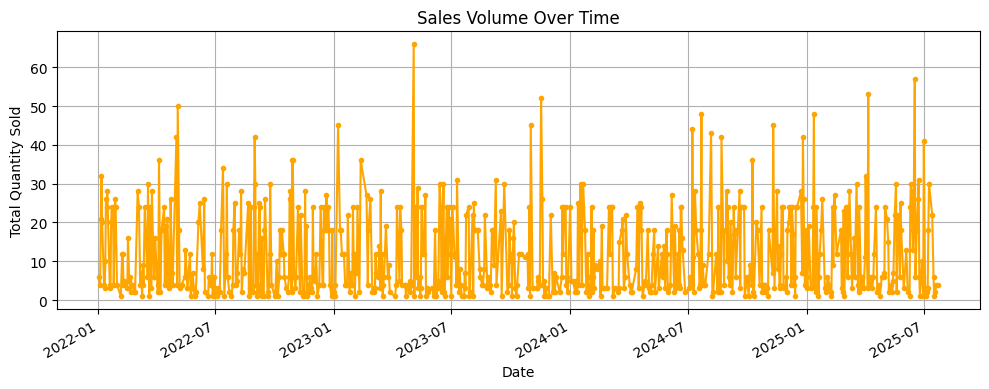

/tmp/ipython-input-2708321580.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=orders_by_day.index, y=orders_by_day.values, palette="viridis")


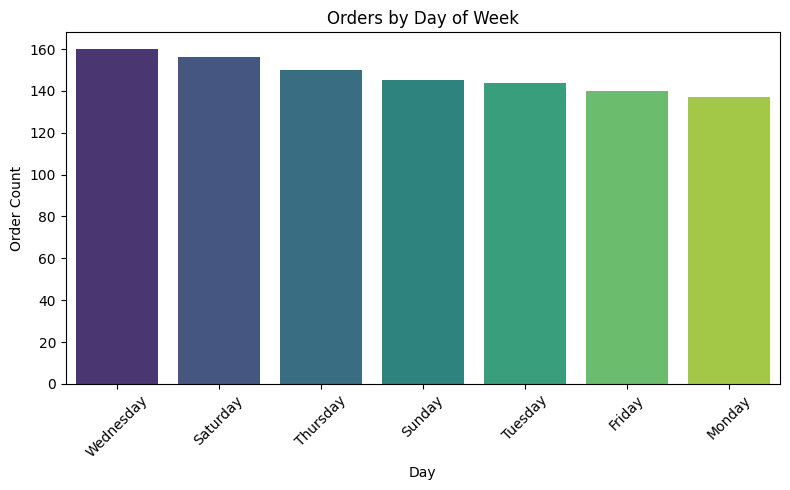


 Most Frequently Sold Product Flavor: chocolate
 Most Used Payment Mode: upi

 Average Unit Price by Product Type:
product_type
tiramisu    800.000000
cake        709.022222
cupcake     573.726415
bento       407.522124
Name: unit_price, dtype: float64

 Peak Sales Day: 2023-05-04 with revenue ₹34980.00


In [ ]:
# 1. Total Quantity Sold by Product Type
quantity_by_type = df.groupby('product_type')['quantity'].sum().sort_values(ascending=False)
print("\n Total Quantity Sold by Product Type:")
print(quantity_by_type)

# 2. Average Quantity Sold per Order
avg_qty = df['quantity'].mean()
print(f"\n Average Quantity per Order: {avg_qty:.2f}")

# 3. Sales Volume Trend Over Time (Line Chart)
daily_sales = df.groupby('sale_date')['quantity'].sum()
plt.figure(figsize=(10,4))
daily_sales.plot(kind='line', marker='.', color='orange')
plt.title("Sales Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Total Quantity Sold")
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Order Count by Day of Week
df['day_of_week'] = df['sale_date'].dt.day_name()
orders_by_day = df['day_of_week'].value_counts()
plt.figure(figsize=(8,5))
sns.barplot(x=orders_by_day.index, y=orders_by_day.values, palette="viridis")
plt.title("Orders by Day of Week")
plt.xlabel("Day")
plt.ylabel("Order Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Most Frequently Sold Product Flavor
most_frequent_flavor = df['product_flavor'].mode()[0]
print(f"\n Most Frequently Sold Product Flavor: {most_frequent_flavor}")

# 6. Most Used Payment Mode
most_common_payment = df['payment_mode'].mode()[0]
print(f" Most Used Payment Mode: {most_common_payment}")

# 7. Average Unit Price by Product Type
avg_unit_price = df.groupby('product_type')['unit_price'].mean().sort_values(ascending=False)
print("\n Average Unit Price by Product Type:")
print(avg_unit_price)

# 8. Peak Sales Day
peak_day = df.groupby('sale_date')['total_price'].sum().idxmax()
peak_value = df.groupby('sale_date')['total_price'].sum().max()
print(f"\n Peak Sales Day: {peak_day.date()} with revenue ₹{peak_value:.2f}")


EDA KPI'S

 Data Summary:

            sale_id   product_id product_type product_flavor     quantity  \
count   1032.000000  1032.000000         1032           1032  1032.000000   
unique          NaN          NaN            4              9          NaN   
top             NaN          NaN      cupcake      chocolate          NaN   
freq            NaN          NaN          424            172          NaN   
mean     516.500000     9.286822          NaN            NaN     7.958333   
min        1.000000     1.000000          NaN            NaN     1.000000   
25%      258.750000     5.000000          NaN            NaN     2.000000   
50%      516.500000     9.000000          NaN            NaN     4.000000   
75%      774.250000    14.000000          NaN            NaN    12.000000   
max     1032.000000    18.000000          NaN            NaN    24.000000   
std      298.057042     5.206604          NaN            NaN     7.889588   

         unit_price   total_price                      sale

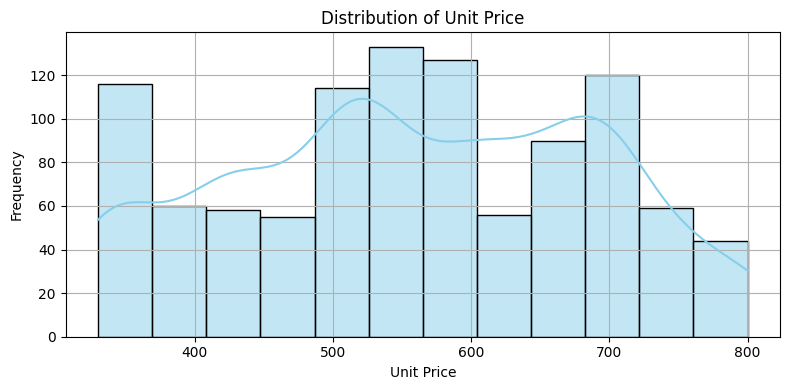

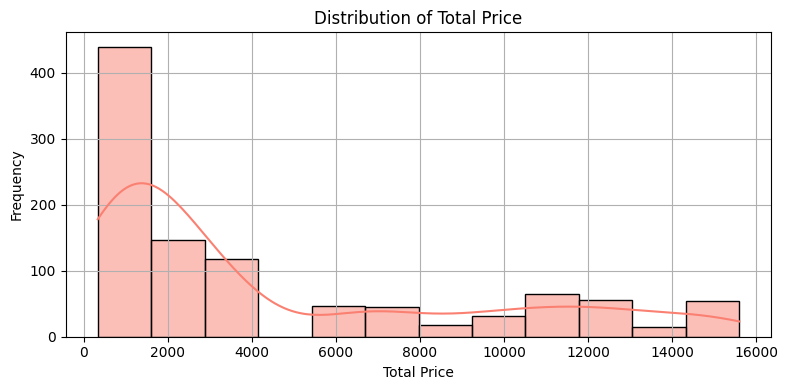

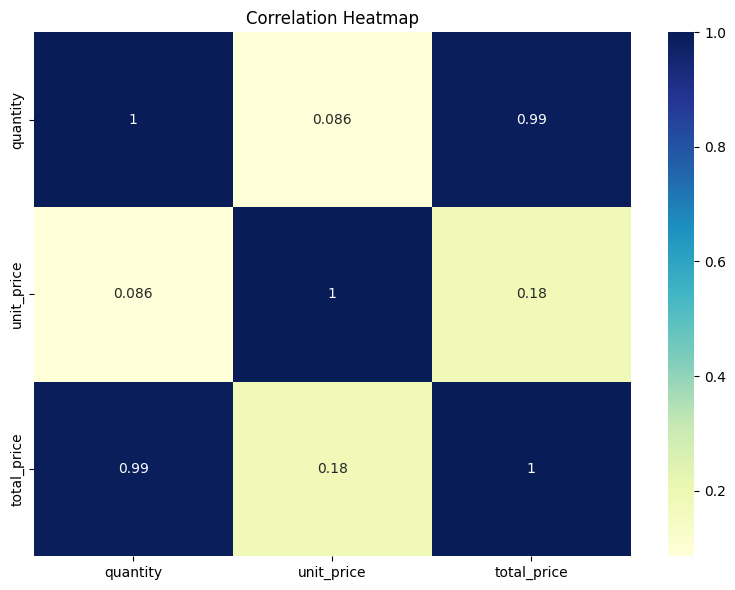

/tmp/ipython-input-3168189462.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette="mako")


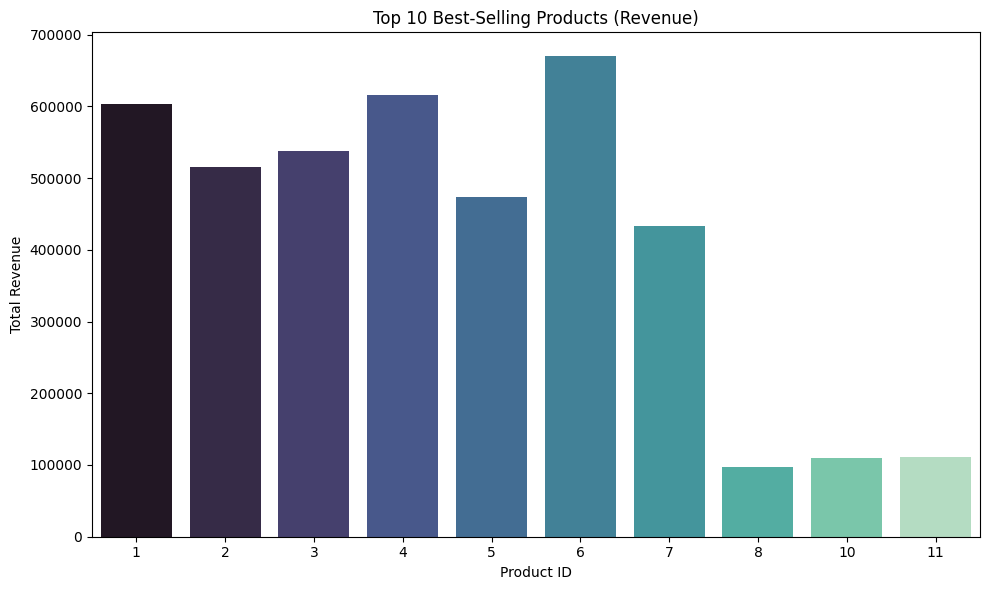

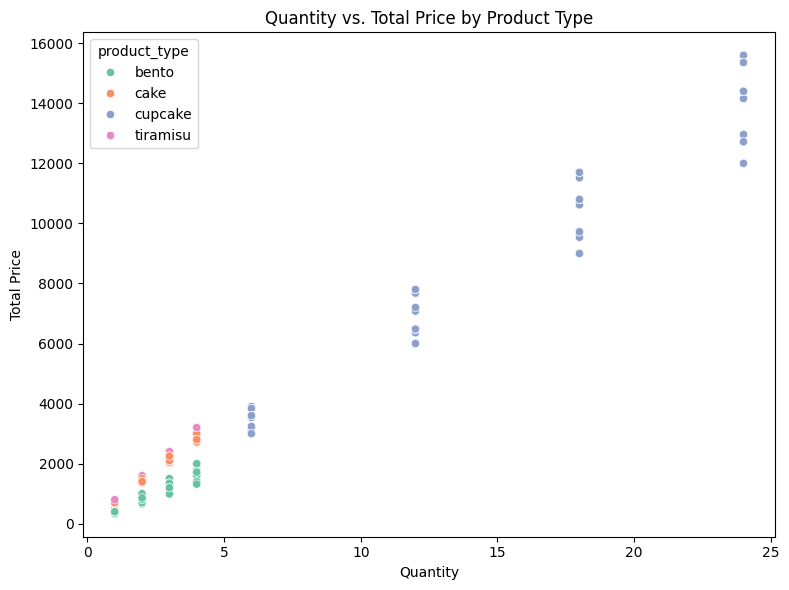

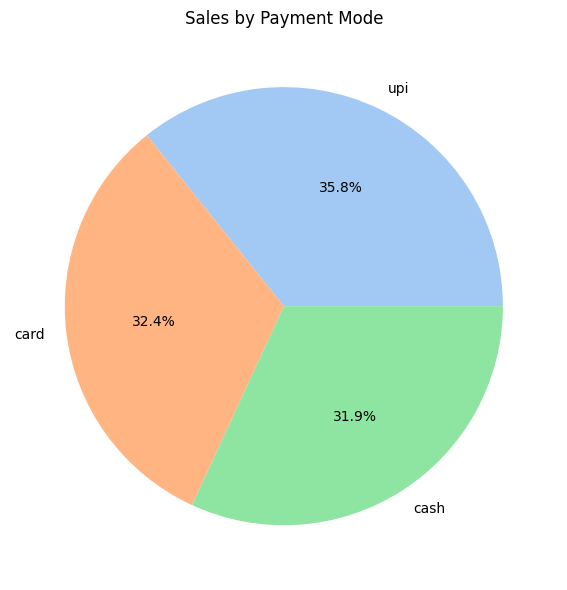

In [ ]:
# 1. Data Summary & Missing Values
print(" Data Summary:\n")
print(df.describe(include='all'))

print("\n Missing Values:\n")
print(df.isnull().sum())

# 2. Distribution of Unit Price
plt.figure(figsize=(8, 4))
sns.histplot(df['unit_price'], kde=True, color='skyblue')
plt.title("Distribution of Unit Price")
plt.xlabel("Unit Price")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Distribution of Total Price
plt.figure(figsize=(8, 4))
sns.histplot(df['total_price'], kde=True, color='salmon')
plt.title("Distribution of Total Price")
plt.xlabel("Total Price")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Correlation Heatmap (for numerical columns)
plt.figure(figsize=(8,6))
sns.heatmap(df[['quantity', 'unit_price', 'total_price']].corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# 5. Top 10 Best-Selling Products (by revenue)
top_products = df.groupby('product_id')['total_price'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_products.index, y=top_products.values, palette="mako")
plt.title("Top 10 Best-Selling Products (Revenue)")
plt.xlabel("Product ID")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()

# 6. Quantity vs. Total Price (Scatter Plot)
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='quantity', y='total_price', hue='product_type', palette='Set2')
plt.title("Quantity vs. Total Price by Product Type")
plt.xlabel("Quantity")
plt.ylabel("Total Price")
plt.tight_layout()
plt.show()

# 7. Sales by Payment Mode (Pie Chart)
payment_counts = df['payment_mode'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title("Sales by Payment Mode")
plt.tight_layout()
plt.show()


PRODUCT RECOMMENDER BASED ON DATASET: Using columns- customer_id;  product_id;
quantity

In [ ]:
!pip install scikit-surprise


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2469553 sha256=511f27ea10c7848e466fd5593630f61b19a59a164f3e83ad0804c12989e76eca
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [ ]:
!pip install scikit-surprise
!pip install numpy==1.26.4

# Task
Explain and fix the error in the provided Python code that uses the `surprise` library for building a product recommender system. The code snippet is intended to load data, prepare it for the `surprise` library, and train a recommendation model. If a direct fix isn't possible, diagnose the potential causes of the error.

## Verify numpy and surprise installation

### Subtask:
Check the installed versions of NumPy and scikit-surprise to confirm they are compatible.


**Reasoning**:
Check the installed versions of numpy and scikit-surprise to understand the environment.



In [ ]:
!pip show numpy
!pip show scikit-surprise

Name: numpy
Version: 1.26.4
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2023, NumPy Developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are
met:

    * Redistributions of source code must retain the above copyright
       notice, this list of conditions and the following disclaimer.

    * Redistributions in binary form must reproduce the above
       copyright notice, this list of conditions and the following
       disclaimer in the documentation and/or other materials provided
       with the distribution.

    * Neither the name of the NumPy Developers nor the names of any
       contributors may be used to endorse or promote products derived
       from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYR

## Ensure data is accessible

### Subtask:
Confirm the `df` DataFrame is correctly loaded and contains the necessary columns (`customer_id`, `product_id`, `quantity`).


**Reasoning**:
Display the first few rows, column names, data types, and shape of the DataFrame to verify its structure and content.



**Reasoning**:
The error indicates that the DataFrame `df` was not loaded into the current environment. I will reload the data and then perform the requested checks.



**Reasoning**:
The error indicates that the file 'sales_1032_records.xlsx' was not found. This is likely because the runtime was restarted and the uploaded file is no longer available. I need to re-upload the file before I can load the dataframe.



In [ ]:
from google.colab import files

uploaded = files.upload()

Saving sales_1032_records.xlsx to sales_1032_records.xlsx


**Reasoning**:
The file has been uploaded. Now I can reload the dataframe and perform the checks to confirm it's correctly loaded and contains the necessary columns.



In [ ]:
import pandas as pd

# Reload the DataFrame
df = pd.read_excel('sales_1032_records.xlsx', skiprows=1)

# Display the first 5 rows
display(df.head())

# Print the column names
print("\nColumn Names:", df.columns.tolist())

# Check the data types of the relevant columns
print("\nColumn Data Types:\n", df[['customer_id', 'product_id', 'quantity']].dtypes)

# Print the shape of the DataFrame
print("\nDataFrame Shape:", df.shape)

,sale_id,product_id,product_type,product_flavor,quantity,unit_price,total_price,sale_date,customer_id,payment_mode
0,1,13,bento,chocolate,2,350,700,2025-06-06,6111,card
1,2,17,bento,nutella,1,450,450,2023-08-05,5456,card
2,3,10,cake,red velvet,3,700,2100,2023-06-28,9822,cash
3,4,11,cake,lemon blueberry,3,750,2250,2023-11-24,9326,card
4,5,18,bento,nutella rocher,4,500,2000,2023-08-22,8554,card



Column Names: ['sale_id', 'product_id', 'product_type', 'product_flavor', 'quantity', 'unit_price', 'total_price', 'sale_date', 'customer_id', 'payment_mode']

Column Data Types:
 customer_id    int64
product_id     int64
quantity       int64
dtype: object

DataFrame Shape: (1032, 10)


## Run the recommender code

### Subtask:
Run the code to build and test the product recommender system using the `surprise` library.


**Reasoning**:
The `df` dataframe is confirmed to be loaded and contains the necessary columns. Now, load the data into the `surprise` `Dataset` object and train the SVD model according to the instructions.



In [ ]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

# Step 1: Prepare the data for Surprise
reader = Reader(rating_scale=(0, df['quantity'].max()))
data = Dataset.load_from_df(df[['customer_id', 'product_id', 'quantity']], reader)

# Step 2: Train-test split
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Step 3: Train the model (SVD algorithm)
model = SVD()
model.fit(trainset)

# Step 4: Test the model
predictions = model.test(testset)
print("RMSE:", accuracy.rmse(predictions))

RMSE: 4.3469
RMSE: 4.346892237857844


**Reasoning**:
The SVD model has been trained and evaluated. The next steps are to generate recommendations for a sample customer based on the trained model, as outlined in the remaining instructions.



In [ ]:
# Step 5: Get recommendations for a sample customer
# You can replace this with any customer_id from your data
customer_id = df['customer_id'].iloc[0]  # Example: first customer in dataset

# Step 6: Get all products
all_products = df['product_id'].unique()

# Step 7: Find products not purchased by this customer
customer_products = df[df['customer_id'] == customer_id]['product_id'].unique()
products_not_purchased = [pid for pid in all_products if pid not in customer_products]

# Step 8: Predict interest in those products
recommendations = []
for product_id in products_not_purchased:
    pred = model.predict(customer_id, product_id)
    recommendations.append((product_id, pred.est))

# Step 9: Sort and get top 5
recommendations.sort(key=lambda x: x[1], reverse=True)
top_recommendations = recommendations[:5]

# Step 10: Display results
print(f"Top 5 product recommendations for customer {customer_id}:")
for product, score in top_recommendations:
    print(f"Product ID: {product}, Predicted Interest Score: {score:.2f}")

Top 5 product recommendations for customer 6111:
Product ID: 2, Predicted Interest Score: 14.71
Product ID: 4, Predicted Interest Score: 14.01
Product ID: 6, Predicted Interest Score: 13.62
Product ID: 1, Predicted Interest Score: 13.59
Product ID: 5, Predicted Interest Score: 13.24


## Evaluate and refine

### Subtask:
Evaluate the performance of the trained SVD model and consider potential refinements.


**Reasoning**:
Analyze the RMSE, reflect on limitations, and note potential refinements.



In [ ]:
# 1. Analyze the reported RMSE value
rmse = 4.3469  # This value is from the previous output

print(f"Reported RMSE: {rmse:.4f}")
print("\nEvaluation of RMSE:")
print(f"- The RMSE of {rmse:.4f} represents the typical error in predicting the 'quantity' of products a customer might purchase.")
print("- A lower RMSE is generally better, indicating more accurate predictions.")
print("- To determine if this is 'reasonable', we need context:")
print("  - What is the typical range of the 'quantity' feature? (From df.describe(), min=1, max=24, mean=7.96)")
print(f"  - An RMSE of {rmse:.4f} means the model's predictions are off by about 4.35 units on average.")
print("  - Compared to the quantity range (1-24) and mean (7.96), this RMSE is relatively high.")
print("  - This suggests that the model's predictions for quantity might not be highly precise, especially for recommending specific quantities.")
print("  - However, for generating a ranked list of *which* products a customer is *most likely* to buy (regardless of exact quantity), this RMSE might still be acceptable.")

# 2. Reflect on potential limitations
print("\nPotential Limitations of the Current Model and Data:")
print("- **Data Sparsity:** The dataset might be sparse (many customers haven't bought many products, and many products haven't been bought by many customers). SVD can handle sparsity but its performance can be impacted.")
print("- **Feature Limitation:** The model only uses customer_id, product_id, and quantity. It doesn't consider other potentially relevant factors like:")
print("  - Product characteristics (type, flavor, price)")
print("  - Customer demographics or purchase history patterns beyond just quantity.")
print("  - Temporal factors (trends over time, seasonality).")
print("- **Implicit Feedback:** 'Quantity' is treated as explicit feedback (like a rating), but it might be more of an implicit signal of preference. A quantity of 1 vs 2 might not indicate a huge difference in preference compared to not purchasing at all.")
print("- **Model Choice:** SVD is a good starting point, but other algorithms (like NMF, or collaborative filtering based on item similarity) might perform better depending on the data structure.")
print("- **Evaluation Metric:** RMSE measures prediction error. For a recommender, metrics like precision, recall, or coverage might be more relevant to evaluate the quality of the *recommendation list* itself.")

# 3. Consider potential refinements for future work
print("\nPotential Refinements for Future Work:")
print("- **Data Enrichment:** Incorporate product features (type, flavor) and potentially customer data (if available) into the model.")
print("- **Explore Different Algorithms:** Experiment with other algorithms available in Surprise (e.g., NMF, SlopeOne, CoClustering) or other libraries (e.g., LightFM for incorporating features).")
print("- **Address Sparsity:** Techniques like adding implicit feedback (treating any purchase as a positive interaction) or using algorithms designed for implicit data.")
print("- **Alternative Evaluation Metrics:** Evaluate recommendations using ranking-based metrics (e.g., Precision@K, Recall@K, NDCG) on a held-out test set or through A/B testing.")
print("- **Hyperparameter Tuning:** Optimize the hyperparameters of the chosen model (e.g., number of factors in SVD) using techniques like cross-validation.")
print("- **Temporal Analysis:** Incorporate the 'sale_date' to understand and potentially model trends or seasonality in recommendations.")
print("- **Content-Based Filtering:** If detailed product descriptions are available, combine with collaborative filtering for a hybrid approach.")

# 4. Summarize evaluation and areas for improvement
print("\nSummary:")
print(f"The SVD model achieved an RMSE of {rmse:.4f} on the test set. Compared to the range of the 'quantity' feature, this indicates a moderate level of prediction error.")
print("Key limitations include the reliance solely on customer-product-quantity interactions, potential data sparsity, and the exclusion of other valuable features.")
print("Future work should focus on exploring richer data sources (product/customer features), experimenting with different recommendation algorithms, refining evaluation metrics, and tuning the model to improve recommendation accuracy and relevance.")

Reported RMSE: 4.3469

Evaluation of RMSE:
- The RMSE of 4.3469 represents the typical error in predicting the 'quantity' of products a customer might purchase.
- A lower RMSE is generally better, indicating more accurate predictions.
- To determine if this is 'reasonable', we need context:
  - What is the typical range of the 'quantity' feature? (From df.describe(), min=1, max=24, mean=7.96)
  - An RMSE of 4.3469 means the model's predictions are off by about 4.35 units on average.
  - Compared to the quantity range (1-24) and mean (7.96), this RMSE is relatively high.
  - This suggests that the model's predictions for quantity might not be highly precise, especially for recommending specific quantities.
  - However, for generating a ranked list of *which* products a customer is *most likely* to buy (regardless of exact quantity), this RMSE might still be acceptable.

Potential Limitations of the Current Model and Data:
- **Data Sparsity:** The dataset might be sparse (many customers 

## Generate recommendations

### Subtask:
Generate product recommendations for a specific customer using the trained SVD model.


**Reasoning**:
Generate product recommendations for a specific customer using the trained SVD model by identifying products not purchased by the customer, predicting their interest, and sorting to find the top recommendations.



In [ ]:
# Step 6: Get recommendations for a customer (example: customer_id = the first customer in the dataframe)
customer_id = df['customer_id'].iloc[0]  # pick any valid customer_id
all_products = df['product_id'].unique()

# Predict ratings for all products the customer hasn't purchased
customer_products = df[df['customer_id'] == customer_id]['product_id'].unique()
products_not_purchased = [pid for pid in all_products if pid not in customer_products]

recommendations = []
for product_id in products_not_purchased:
    pred = model.predict(customer_id, product_id)
    recommendations.append((product_id, pred.est))

# Sort by estimated interest
recommendations.sort(key=lambda x: x[1], reverse=True)

# Top 5 Recommendations
top_recommendations = recommendations[:5]
print("Top 5 product recommendations for customer", customer_id, ":", top_recommendations)

Top 5 product recommendations for customer 6111 : [(2, 14.71343557193942), (4, 14.01493724413921), (6, 13.623130369408416), (1, 13.591923377532396), (5, 13.241214736719177)]
